Numpy and Images.

Computer Vision - Session 03.

Computer Science, ITAM.

January 23rd, 2019.

In [0]:
# imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# scalar, vector, and matrix
a = 2
b = 3.1416
c = np.array([0, 1, 2, 3])
d = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]])
print(f'shape of c: {c.shape}')
print(f'shape of d: {d.shape}')

shape of c: (4,)
shape of d: (4, 3)


In [0]:
# List
e = [0, 1, 2, 3, 4]

In [4]:
whos

Variable   Type       Data/Info
-------------------------------
a          int        2
b          float      3.1416
c          ndarray    4: 4 elems, type `int64`, 32 bytes
d          ndarray    4x3: 12 elems, type `int64`, 96 bytes
e          list       n=5
np         module     <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt        module     <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>


In [5]:
# Comprehension
e = [x**2 for x in range(10)]
print(e)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [6]:
# Comprehension to ndarray
e = np.array([x**2 for x in range(10)])
print(e)

[ 0  1  4  9 16 25 36 49 64 81]


In [7]:
# Shapes
f = np.arange(2, 9)
print(f.shape)
f = np.arange(2, 9).reshape(7, 1)
print(f.shape)

(7,)
(7, 1)


In [8]:
# Reshape
g = np.arange(15).reshape(3, 5)
print(g)
g = g.reshape(5, 3)
print(g)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [9]:
# Zeros, Ones, Identity and Random
z = np.zeros((2, 3))
print(z)
o = np.ones((2, 3))
print(o)
I = np.eye(5)
print(I)
L = np.linspace(0, 10, 21)
print(L)
R = np.random.random((3, 2))
print(R)

[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]
[[0.19880655 0.00415113]
 [0.03060993 0.60192858]
 [0.16939232 0.22785418]]


In [10]:
z.dtype

dtype('float64')

In [11]:
type(z)

numpy.ndarray

In [12]:
# Indexing and slicing
print(L[1])        # Second element
print(L[1:5])      # 2nd to 4th elements
print(L[:5])       # First four elements
print(L[5:])       # From 5th to last element
print(L[-1])       # Last element
print(I[:3, :3])   # First 3 rows and 3 columns

0.5
[0.5 1.  1.5 2. ]
[0.  0.5 1.  1.5 2. ]
[ 2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.
  9.5 10. ]
10.0
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [13]:
# Indexing
R > 0.5

array([[False, False],
       [False,  True],
       [False, False]])

In [14]:
R[R > 0.5]

array([0.60192858])

In [15]:
# scaling
print(2 * np.array([3, 6, 9]))

[ 6 12 18]


In [16]:
# sums
a = np.array([1, 2, 3])
b = np.array([9, 8, 7])
print(a.sum())
print(b.cumsum())
print(a + b)

6
[ 9 17 24]
[10 10 10]


In [17]:
# product
print(a * b)  # elementwise
print(np.multiply(a, b))
print(np.dot(a, b))  # Dot product

[ 9 16 21]
[ 9 16 21]
46


== Kernel and Convolution 1D ==

In [0]:
# Initial signal and kernel 1D
I = np.array([0., 0., 0., 0.9, 0., 0., 0., 0., 0.9, 0., 0., 0.])
k = np.array([1., -1.])

In [19]:
# Convolve, step by step
O = np.zeros_like(I)
for it_I in range(1, len(I)):
  O[it_I] = k[0]*I[it_I] + k[1]*I[it_I-1]
print(O)

[ 0.   0.   0.   0.9 -0.9  0.   0.   0.   0.9 -0.9  0.   0. ]


In [20]:
# Convolve, step by step
I = np.array([0., 0., 0., 0.9, 0.9, 1., 1., 1., 0.9, 0., 0., 0.])
k = np.array([1., -1.])
O = np.zeros_like(I)
for it_I in range(1, len(I)):
  O[it_I] = k[0]*I[it_I] + k[1]*I[it_I-1]
print(O)

[ 0.   0.   0.   0.9  0.   0.1  0.   0.  -0.1 -0.9  0.   0. ]


In [21]:
# Average convolution
I = np.array([0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.])
k = 1/3 * np.array([1, 1, 1])

Id = np.zeros(len(I)+2)
Id[1:-1] = I

O = np.zeros_like(Id)
for it_Id in range(1, len(Id)-1):
  O[it_Id] = k[0]*Id[it_Id+1] + k[1]*Id[it_Id] + k[2]*Id[it_Id-1]
print(O)

[0.         0.33333333 0.33333333 0.66666667 0.66666667 1.
 1.         1.         0.66666667 0.33333333 0.33333333 0.33333333
 0.33333333 0.        ]


== Image processing ==

In [0]:
# read an image
from skimage.io import imread
#img = imread('Lena-grayscale.jpg')
# Load from module
from skimage import data
img = data.coins()

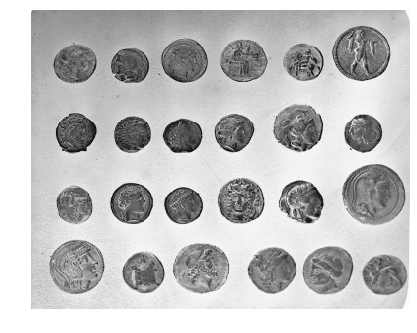

(303, 384)


In [23]:
# Show image
plt.imshow(img)
plt.axis('off')
plt.show()
print(img.shape)

In [0]:
# Functions
from skimage.transform import resize
def resize_img(img):
  return resize(img, (256, 256))

In [25]:
img = resize_img(img)
print(img.shape)
print(img.min())
print(img.max())

(256, 256)
0.01395335477941405
0.9404660692401958


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
